In [180]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [181]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [182]:
mnist = tf.keras.datasets.fashion_mnist

In [183]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

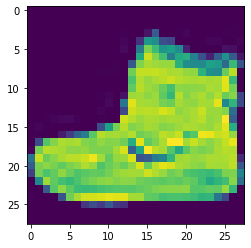

In [184]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [185]:
training_images = training_images / 255.0
test_images = test_images / 255.0

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

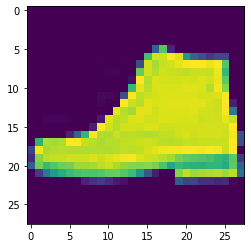

In [186]:
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

In [187]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [188]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4760 - accuracy: 0.8306
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3591 - accuracy: 0.8687
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3231 - accuracy: 0.8810
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8893
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2812 - accuracy: 0.8954
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9004
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2527 - accuracy: 0.9057
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2420 - accuracy: 0.9099
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2317 - accuracy: 0.9122
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [189]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 833us/step - loss: 0.4544 - accuracy: 0.8871


[0.4544295370578766, 0.8870999813079834]

In [190]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 740us/step
[4.5679230e-20 1.3458030e-18 3.8194613e-16 2.2256399e-22 8.0874888e-18
 2.3021995e-08 6.9950575e-17 8.3518864e-07 6.5509869e-21 9.9999917e-01]
9


In [191]:
print(test_labels[0])

9
